In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
nb_classes = 10

In [33]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [42]:
W1 = tf.Variable(tf.random_normal([784, 100]))
b1 = tf.Variable(tf.random_normal([100]))
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

In [43]:
W2 = tf.Variable(tf.random_normal([100, 100]))
b2 = tf.Variable(tf.random_normal([100]))
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [44]:
W3 = tf.Variable(tf.random_normal([100, 100]))
b3 = tf.Variable(tf.random_normal([100]))
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

In [45]:
W4 = tf.Variable(tf.random_normal([100, nb_classes]))
b4 = tf.Variable(tf.random_normal([nb_classes]))
hypothesis = tf.nn.softmax(tf.matmul(layer3, W4) + b4)

In [46]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [47]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [48]:
training_epochs = 15
batch_size = 100

Epoch: 0001 cost = 1.650159491
Epoch: 0002 cost = 0.914586164
Epoch: 0003 cost = 0.731060020
Epoch: 0004 cost = 0.628772640
Epoch: 0005 cost = 0.560330145
Epoch: 0006 cost = 0.510743208
Epoch: 0007 cost = 0.472506091
Epoch: 0008 cost = 0.441677984
Epoch: 0009 cost = 0.415976437
Epoch: 0010 cost = 0.394489129
Epoch: 0011 cost = 0.375600418
Epoch: 0012 cost = 0.358925614
Epoch: 0013 cost = 0.343874336
Epoch: 0014 cost = 0.331408443
Epoch: 0015 cost = 0.319053202
Accuracy: 0.8923
Label:  [1]
Prediction: [1]


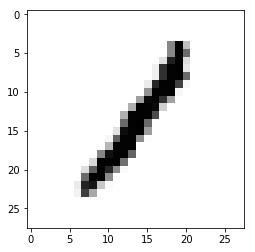

In [49]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch: {:04d} cost = {:.9f}'.format((epoch + 1), avg_cost))
    print("Accuracy:", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}))

    plt.imshow(mnist.test.images[r : r + 1].reshape(28, 28), cmap="Greys", interpolation="nearest")
    plt.show()

## note
```
hypothesis = tf.nn.softmax(tf.matmul(layer3, W4) + b4)
```
위 코드를 처음에 
```
layer4 = tf.sigmoid(tf.matmul(layer3, W4) + b4)
hypothesis = tf.nn.softmax(layer4)
```
로 코딩했었는데 확률이 너무 이상하게 나와서 뭐가 잘못된 것 같았다.

생각해보니 100개로 들어온 input을 10개로 줄이는 과정에서 값들간의 차이가 커야 구분하기가 유리해지는데 sigmoid를 하여 벌어진 값들을 다시 0과 1사이의 값으로 모았으니 그런 문제가 생긴 것이 당연했다.